In [1]:
from ultralytics import YOLO
import cv2

In [2]:
model = YOLO('runs/segment/train10/weights/best.pt') # load model

In [3]:
results = model.predict('demo.png', save = True)


image 1/1 C:\Users\cbamm\1 Jupyter\Senior Design 1\demo.png: 640x384 1 door, 437.1ms
Speed: 9.9ms preprocess, 437.1ms inference, 39.0ms postprocess per image at shape (1, 3, 640, 384)
Results saved to C:\Users\cbamm\1 Jupyter\Senior Design 1\runs\segment\predict18


In [4]:
for r in results:
    # print(r.boxes.cls, r.boxes.conf)  # class and confidence
    print(f"Class: {float(r.boxes.cls):.0f}" )
    print(f"Confidence: {100*float(r.boxes.conf):.2f}%" )

Class: 0
Confidence: 99.41%


In [5]:
img_path = r"runs/segment/predict16/demo.jpg"
img = cv2.imread(img_path)

scale = 0.33 # 33% scale
h, w = img.shape[:2] # extracts h and w from image
img = cv2.resize(img, (int(w*scale), int(h*scale))) # resizes image

cv2.imshow("Segmented Door", img) # displays the image
cv2.waitKey(0) # waits for key press before continuing
cv2.destroyAllWindows() # closes all OpenCV windows after you are done viewing

In [6]:
mask = results[0].masks.data[0].cpu().numpy() 
# extracts segmentation mask from YOLO output for first detected object (class 0: door) and converts into a numpy array for OpenCV usage
# results[0] = first image in prediction
# masks.data[0] = first detected object mask
# mask of first object detected in the first image

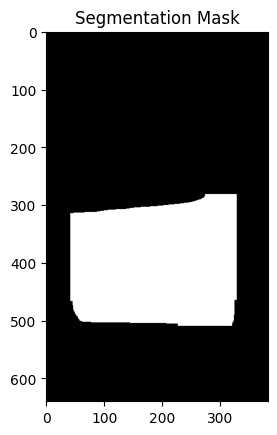

In [7]:
# Mask Visualization
import matplotlib.pyplot as plt
plt.imshow(mask, cmap='gray')
plt.title("Segmentation Mask")
plt.show()

In [8]:
import numpy as np
img = results[0].orig_img.copy() # copy of original image 

for poly in results[0].masks.xy:

    poly = poly.astype(np.int32)
    e = 0.001 * cv2.arcLength(poly, True) # smaller e = smoother contour
    smooth = cv2.approxPolyDP(poly, e, True)
    cv2.drawContours(img, [smooth], -1, (0,255,0), 2)

contour = smooth
e = 0.02 * cv2.arcLength(contour, True)
approx = cv2.approxPolyDP(contour, e, True)

for pt in approx:
    cv2.circle(img, tuple(pt[0]), 10, (0,0,255), -1)

print("Corner Coordinates:", approx.reshape(-1, 2) )

M = cv2.moments(contour)
if M["m00"] != 0:
    cx, cy = int(M["m10"]/M["m00"]), int(M["m01"]/M["m00"])
    cv2.circle(img, (cx, cy), 10, (255,0,0), -1)
    print("Centroid:", (cx, cy) )

cv2.imwrite("door_features.jpg", img)

Corner Coordinates: [[ 951  846]
 [  90  945]
 [ 138 1500]
 [ 927 1527]]
Centroid: (537, 1206)


True